# Homework 7, Part Two: A dataset about dogs.

Data from [a FOIL request to New York City](https://www.muckrock.com/foi/new-york-city-17/pet-licensing-data-for-new-york-city-23826/).

Some of the questions get kind of weird in this one, especially later on. **Feel free to lean on ChatGPT for the crazier ones!** It might be an interesting exploration of how to ask problems or explain what your dataset looks like.

## Do your importing and your setup

In [21]:
import pandas as pd

## Read in the file `NYC_Dog_Licenses_Current_as_of_4-28-2016.xlsx` and look at the first five rows

In [22]:
pip install openpyxl


[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [23]:
df = pd.read_excel('NYC_Dog_Licenses_Current_as_of_4-28-2016.xlsx')
df.head(5)

,Owner Zip Code,Animal Name,Animal Gender,Primary Breed,Secondary Breed,Animal Dominant Color,Animal Secondary Color,Animal Third Color,Animal Birth,Spayed or Neut,Guard or Trained,Vaccinated,Application Date,License Issued Date,License Expired Date
0,10024,BLUE MACK,M,Unknown,AIREDALE TERR,BROWN,BLACK,NaN,2007-11-01,Yes,No,Yes,2012-09-19 16:01:19.647,2015-09-19,2016-09-19
1,10461,Indie Zephir,M,Rottweiler,NaN,BLACK,TAN,NaN,2013-04-01,No,No,Yes,2013-09-20 11:41:36.647,2014-09-20,2018-09-20
2,10013,Bilal,M,Australian Cattledog,NaN,Rust,NaN,NaN,2014-09-01,Yes,NaN,No,2014-09-12 13:13:36.713,2014-09-12,2019-09-12
3,10025,Buddy,M,Unknown,Cockapoo,BLOND,WHITE,NaN,2008-04-01,Yes,No,Yes,2014-09-12 15:26:51.417,2014-09-12,2017-10-20
4,10013,Ali,M,Basenji,NaN,Black,NaN,NaN,2014-01-01,No,NaN,No,2014-09-12 15:43:17.707,2014-09-12,2019-09-12


## How many rows do you have in the data? What are the column types?

If there are more than 30,000 rows in your dataset, go back and only read in the first 30,000.

In [24]:
rows, columns = df.shape
print(f"Number of rows: {rows}")
print(f"Number of columns: {columns}")

Number of rows: 81937
Number of columns: 15


In [25]:
columns = df.dtypes
columns

Owner Zip Code                     int64
Animal Name                       object
Animal Gender                     object
Primary Breed                     object
Secondary Breed                   object
Animal Dominant Color             object
Animal Secondary Color            object
Animal Third Color                object
Animal Birth              datetime64[ns]
Spayed or Neut                    object
Guard or Trained                  object
Vaccinated                        object
Application Date          datetime64[ns]
License Issued Date       datetime64[ns]
License Expired Date      datetime64[ns]
dtype: object

## Describe the dataset in words. What is each row? List two column titles along with what each of those columns means.

For example: “Each row is an animal in the zoo. `is_reptile` is whether the animal is a reptile or not”

Each row is an animal in the zoo. Vaccinated is whether the animal is vaccinated or not.

Each row is an animal in the zoo. Animal Birth is the birth date of each animal.

# Your thoughts

Think of three questions you could ask this dataset. **Don't ask them**, just write them down in the cell below. Feel free to use either Markdown or Python comments.

1. How many unique kinds of dogs are there?

2. Which zip code has most licensed dogs?

3. Why there are dominant, secondary, and third color in terms of each dog? 
   The dominant one is the color covered most of the dog's skin?

# Looking at some dogs

## What are the most popular (primary) breeds of dogs? Graph the top 10.

In [27]:
import matplotlib.pyplot as plt
breed_counts = df['Primary Breed'].value_counts()
top_10_breeds = breed_counts.head(10)

<Axes: xlabel='Primary Breed'>

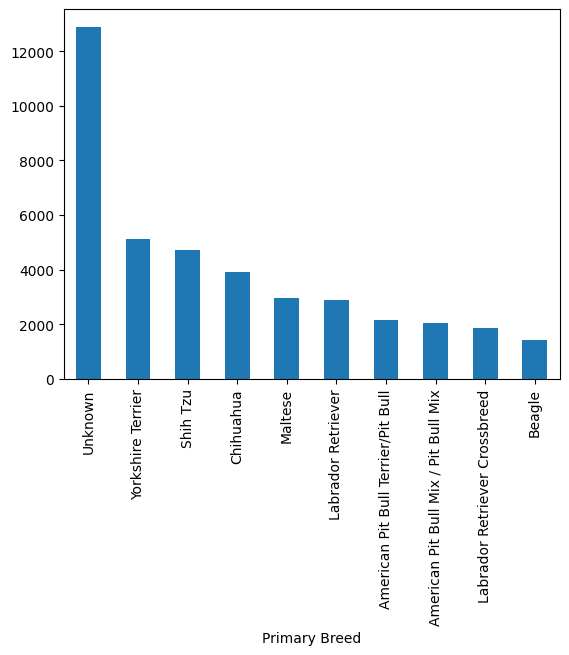

In [28]:
top_10_breeds.plot(kind='bar')

## "Unknown" is a terrible breed! Graph the top 10 breeds that are NOT Unknown

<Axes: xlabel='Primary Breed'>

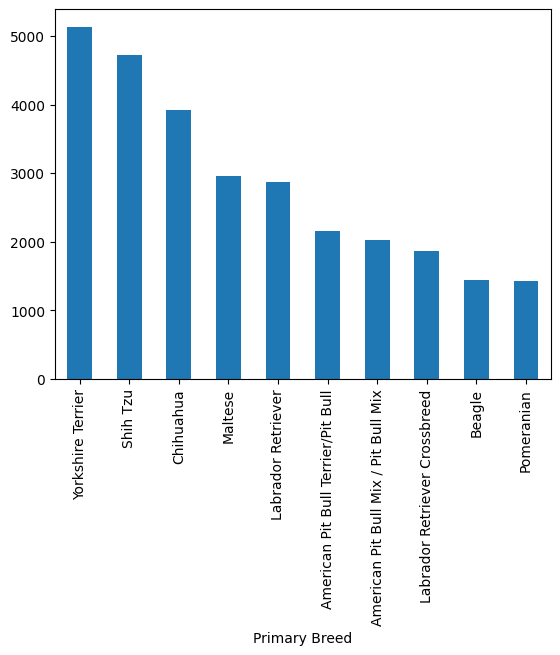

In [30]:
non_unknown_breeds = df[df['Primary Breed'] != 'Unknown']
breed_counts = non_unknown_breeds['Primary Breed'].value_counts()
top_10_non_unknown_breeds = breed_counts.head(10)
top_10_non_unknown_breeds.plot(kind='bar')

## What are the most popular dog names?

In [31]:
dog_name_counts = df['Animal Name'].value_counts()
top_10_dog_names = dog_name_counts.head(10)
top_10_dog_names

Animal Name
UNKNOWN    742
Bella      527
Max        515
Charlie    403
Lola       387
Unknown    379
Rocky      354
Lucy       338
unknown    337
Coco       308
Name: count, dtype: int64

## Do any dogs have your name? How many dogs are named "Max," and how many are named "Maxwell"?

In [33]:
max_counts = df_dog_licenses[df_dog_licenses['Animal Name'].isin(['Max', 'Maxwell'])]['Animal Name'].value_counts()
max_counts

Animal Name
Max        515
Maxwell     30
Name: count, dtype: int64

## What percentage of dogs are guard dogs?

Check out the documentation for [value counts](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.value_counts.html).

In [38]:
guard_dog_count = len(df[df['Guard or Trained'].str.lower() == 'yes'])
total_dog_count = len(df)
percentage_guard_dogs = (guard_dog_count / total_dog_count) * 100
percentage_guard_dogs

0.06224294274869717

## What are the actual numbers?

In [40]:
guard_dogs_count = df[df['Guard or Trained'] == 'Yes'].shape[0]
guard_dogs_count

51

## Wait... if you add that up, is it the same as your number of rows? Where are the other dogs???? How can we find them??????

Use your `.head()` to think about it, then you'll do some magic with `.value_counts()`

In [ ]:
# not really sure what this means?

## Fill in all of those empty "Guard or Trained" columns with "No"

Then check your result with another `.value_counts()`

In [42]:
df['Guard or Trained'].fillna('No', inplace=True)
print(df['Guard or Trained'].value_counts())

Guard or Trained
No     81886
Yes       51
Name: count, dtype: int64


## What are the top dog breeds for guard dogs? 

In [47]:
guard_dogs = df[df['Guard or Trained'] == 'Yes']
top_guard_dog_breeds = guard_dogs['Primary Breed'].value_counts()
top_guard_dog_breeds.head(5)

Primary Breed
Unknown                11
German Shepherd Dog     4
Chihuahua               3
Labrador Retriever      3
Rottweiler              3
Name: count, dtype: int64

## Create a new column called "year" that is the dog's year of birth

The `Animal Birth` column is a datetime, so you can get the year out of it with the code `df['Animal Birth'].apply(lambda birth: birth.year)`.

In [48]:
df['year'] = df['Animal Birth'].apply(lambda birth: birth.year)
df[['Animal Birth', 'year']].head()

,Animal Birth,year
0,2007-11-01,2007
1,2013-04-01,2013
2,2014-09-01,2014
3,2008-04-01,2008
4,2014-01-01,2014


## Calculate a new column called “age” that shows approximately how old the dog is. How old are dogs on average?

In [49]:
current_year = 2023
df['age'] = current_year - df['year']
df[['Animal Birth', 'year', 'age']].head()

,Animal Birth,year,age
0,2007-11-01,2007,16
1,2013-04-01,2013,10
2,2014-09-01,2014,9
3,2008-04-01,2008,15
4,2014-01-01,2014,9


In [51]:
average_age = df['age'].mean()
average_age

13.341848005174707

# Joining data together

## Which neighborhood does each dog live in?

You also have a (terrible) list of NYC neighborhoods in `zipcodes-neighborhoods.csv`. Join these two datasets together, so we know what neighborhood each dog lives in. **Be sure to not read it in as `df`, or else you'll overwrite your dogs dataframe.**

Here's an example of how you can merge two dataframes:

```python
merged = prisons_df.merge(states_df, left_on='state', right_on='name')
```

In the example above, `prisons_df` has a column called `state` that matches with the `name` column of `states_df`. The columns of `states_df` are then added to `prisons_df` and returned as a new dataframe called `merged`.

> **Rows without a match get discarded because it is an [inner join](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.merge.html).** I think left joins are probably the most common (keep rows from the "left" df even if they don't have a match in the right. For example, by default a prison with the state of `PUERTO RICO` would be dropped if PR wasn't in `states_df`, but if you changed it to `how='left'` it would be preserved, but the additional columns would just be `NaN`.

In [54]:
states_df = pd.read_excel('zipcodes-neighborhoods.csv')
states_df.columns
#why it gives me an error message?

ValueError: Excel file format cannot be determined, you must specify an engine manually.

In [ ]:
merged = df.merge(states_df, left_on='Animal Name', right_on='name')
# without column names, I don't know what's the name of the column in zipcode cvs which includes animal names?

## What is the most popular dog name in all parts of the Bronx? How about Brooklyn? The Upper East Side?

In [55]:
bronx_popular_name = df[df['Borough'] == 'Bronx']['Animal Name'].mode().values[0]
bronx_popular_name

KeyError: 'Borough'

In [56]:
brooklyn_popular_name = df[df['Borough'] == 'Brooklyn']['Animal Name'].mode().values[0]
brooklyn_popular_name 

KeyError: 'Borough'

In [57]:
upper_east_side_popular_name = df[df['Neighborhood'] == 'Upper East Side']['Animal Name'].mode().values[0]
upper_east_side_popular_name

KeyError: 'Neighborhood'

## What is the most common dog breed in each of the neighborhoods of NYC?

In [ ]:
common_breeds_by_neighborhood = df.groupby('Neighborhood')['Primary Breed'].agg(lambda x: x.mode().values[0])
# using ChatGPT

In [58]:
common_breeds_by_neighborhood 

NameError: name 'common_breeds_by_neighborhood' is not defined

## What breed of dogs are the least likely to be spayed? Male or female?

In [59]:
df['Spayed'] = df['Spayed or Neut'].apply(lambda x: 'No' if x == 'No' else 'Yes') #using ChatGPT
spayed_percentage_by_breed_gender = df.groupby(['Primary Breed', 'Gender'])['Spayed'].value_counts(normalize=True)[:, :, 'Yes'] * 100
lowest_spar_percentage = spayed_percentage_by_breed_gender.idxmin()

KeyError: 'Gender'

## Make a new column called monochrome that is True for any animal that only has black, white or grey as one of its colors. How many animals are monochrome?

In [60]:
df['monochrome'] = df['Animal Dominant Color'].apply(lambda x: x.lower() in ['black', 'white', 'grey']) #using ChatGPT
monochrome_count = df['monochrome'].sum()
monochrome_count

AttributeError: 'float' object has no attribute 'lower'

## How many dogs are in each borough? Plot it in a graph.

In [61]:
import matplotlib.pyplot as plt
import seaborn as sns #using ChatGPT
borough_counts = df['Borough'].value_counts()
sns.barplot(x=borough_counts.index, y=borough_counts.values, palette="viridis")

ModuleNotFoundError: No module named 'seaborn'

## Which borough has the highest number of dogs per-capita?

You’ll need to merge in `population_boro.csv`

In [62]:
population_df = pd.read_excel('population_boro.csv')
population_df.columns

FileNotFoundError: [Errno 2] No such file or directory: 'population_boro.csv'

In [ ]:
merged1 = df.merge(merged, left_on='Animal Name', right_on='name')
#okay I am kinda totally lost here...

## Make a bar graph of the top 5 breeds in each borough.

How do you groupby and then only take the top X number? This is very crazy, so ask in Slack, or a TA, or our buddy ChatGPT.

## What percentage of dogs are not guard dogs?